# Notebook Imports and Packages

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - Markdown Equations
## A simple cost function
## $$f(x) = x^2 + x + 1$$

In [13]:
def f(x): 
    return x**2 + x + 1

In [ ]:
# Make Data
# linspace returns evenly spaced numbers over a specified interval
x_1 = np.linspace(start=-3, stop=3, num=100)
# x_1

<function matplotlib.pyplot.show(close=None, block=None)>

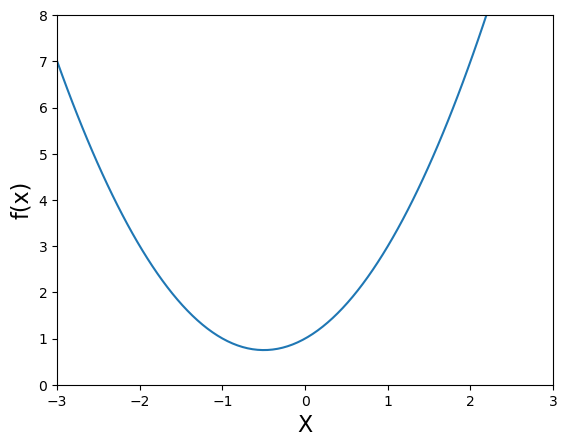

In [37]:
# Plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show

## Slope & Derivatives
Challenge: Create a python function for the derivative of f(x) called df(x)

In [54]:
def df(x):
    return 2*x + 1

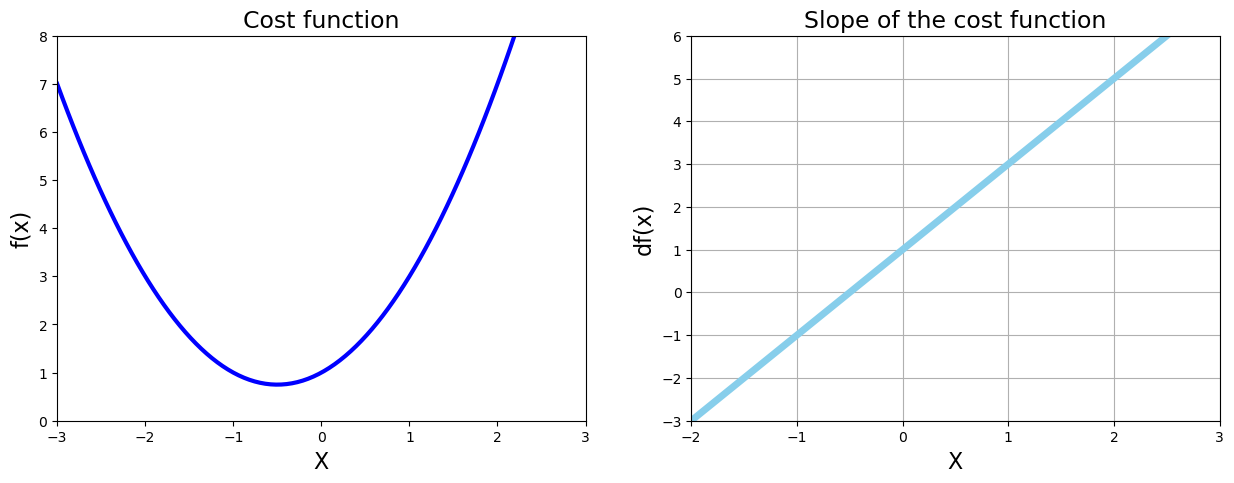

In [84]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #1 row, 2 columns, index 1
plt.xlim(-3,3)
plt.ylim(0,8)

plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost function', fontsize=17)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2) #1 row, 2 columns, index 2
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope of the cost function', fontsize=17)
plt.grid()

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()